In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime
import plotly.graph_objects as go
from scipy.stats import linregress
import warnings

In [2]:
btc_day = pd.read_csv(r"C:\Users\Sahil\Desktop\IITP\VScode\Bitcoin\BTCUSD_day.csv")
btc_day.head()

Date  Symbol     Open     High      Low    Close  Volume BTC  \
0  2020-04-10  BTCUSD  7315.25  7315.25  7315.25  7315.25        0.00   
1  2020-04-09  BTCUSD  7369.60  7378.85  7115.04  7315.25     2237.13   
2  2020-04-08  BTCUSD  7201.81  7432.23  7152.80  7369.60     2483.60   
3  2020-04-07  BTCUSD  7336.96  7468.42  7078.00  7201.81     2333.34   
4  2020-04-06  BTCUSD  6775.21  7369.76  6771.01  7336.96     3727.47   

    Volume USD  
0         0.00  
1  16310014.53  
2  18138080.27  
3  17047120.32  
4  26533750.17

In [3]:
btc_min = pd.read_csv(r"C:\Users\Sahil\Desktop\IITP\VScode\Bitcoin\BTCUSD_1min.csv")
btc_min.head()

Unix Timestamp                 Date  Symbol     Open     High      Low  \
0   1586390400000  2020-04-09 00:00:00  BTCUSD  7369.60  7369.60  7348.47   
1   1586390340000  2020-04-08 23:59:00  BTCUSD  7364.37  7369.60  7364.37   
2   1586390280000  2020-04-08 23:58:00  BTCUSD  7360.89  7367.18  7360.89   
3   1586390220000  2020-04-08 23:57:00  BTCUSD  7357.62  7366.12  7357.62   
4   1586390160000  2020-04-08 23:56:00  BTCUSD  7370.71  7370.71  7357.62   

     Close    Volume  
0  7350.41  7.733528  
1  7369.60  1.310954  
2  7364.37  1.018774  
3  7360.89  0.026251  
4  7357.62  0.444867

In [4]:
btc_hr = pd.read_csv(r"C:\Users\Sahil\Desktop\IITP\VScode\Bitcoin\BTCUSD_1hr.csv")
btc_hr.head()

Unix Timestamp                 Date  Symbol     Open     High      Low  \
0   1586390400000  2020-04-09 00:00:00  BTCUSD  7369.60  7369.60  7338.23   
1   1586386800000  2020-04-08 23:00:00  BTCUSD  7367.28  7398.92  7348.47   
2   1586383200000  2020-04-08 22:00:00  BTCUSD  7337.19  7390.25  7322.87   
3   1586379600000  2020-04-08 21:00:00  BTCUSD  7327.70  7370.00  7311.33   
4   1586376000000  2020-04-08 20:00:00  BTCUSD  7320.11  7375.72  7313.66   

     Close      Volume  
0  7338.23    7.788915  
1  7369.60   66.558293  
2  7367.28   88.486108  
3  7337.19   35.551553  
4  7327.70  153.655811

In [5]:
print('Shape of btc_hr dataset is: ',btc_hr.shape)
print('Shape of btc_min dataset is: ',btc_min.shape)
print('Shape of btc_day dataset is: ',btc_day.shape)

Shape of btc_hr dataset is:  (39465, 8)
Shape of btc_min dataset is:  (2283519, 8)
Shape of btc_day dataset is:  (1647, 8)


In [6]:
btc_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1647 non-null   object 
 1   Symbol      1647 non-null   object 
 2   Open        1647 non-null   float64
 3   High        1647 non-null   float64
 4   Low         1647 non-null   float64
 5   Close       1647 non-null   float64
 6   Volume BTC  1647 non-null   float64
 7   Volume USD  1647 non-null   float64
dtypes: float64(6), object(2)
memory usage: 103.1+ KB


In [7]:
btc_day['Date'] = pd.to_datetime(btc_day['Date'])

In [8]:
btc_day.isnull().sum()

Date          0
Symbol        0
Open          0
High          0
Low           0
Close         0
Volume BTC    0
Volume USD    0
dtype: int64

In [9]:
btc_day.describe()

Open          High           Low         Close    Volume BTC  \
count   1647.000000   1647.000000   1647.000000   1647.000000   1647.000000   
mean    4823.493224   4971.083673   4656.335337   4827.596515   3789.357365   
std     3937.740533   4078.527350   3760.335160   3936.503969   4436.695998   
min      242.500000    245.000000    236.000000    243.950000      0.000000   
25%      741.975000    751.830000    732.030000    742.260000   1028.940000   
50%     4147.100000   4295.090000   4000.000000   4154.840000   2263.370000   
75%     7920.510000   8139.750000   7630.445000   7920.510000   4918.785000   
max    19499.990000  19999.000000  18870.000000  19499.990000  49229.150000   

         Volume USD  
count  1.647000e+03  
mean   2.129125e+07  
std    3.694968e+07  
min    0.000000e+00  
25%    1.659287e+06  
50%    9.395394e+06  
75%    2.464551e+07  
max    5.606539e+08

In [10]:
print(min(btc_day['Date']),"||||",max(btc_day['Date']))

2015-10-08 00:00:00 |||| 2020-04-10 00:00:00


In [11]:
btc_day_copy = btc_day.copy()
btc_day_copy.drop(btc_day_copy[btc_day_copy['Volume BTC'] == 0].index, inplace = True)
btc_day_copy.head()

Date  Symbol     Open     High      Low    Close  Volume BTC  \
1 2020-04-09  BTCUSD  7369.60  7378.85  7115.04  7315.25     2237.13   
2 2020-04-08  BTCUSD  7201.81  7432.23  7152.80  7369.60     2483.60   
3 2020-04-07  BTCUSD  7336.96  7468.42  7078.00  7201.81     2333.34   
4 2020-04-06  BTCUSD  6775.21  7369.76  6771.01  7336.96     3727.47   
5 2020-04-05  BTCUSD  6870.20  6907.90  6678.60  6775.21     1275.49   

    Volume USD  
1  16310014.53  
2  18138080.27  
3  17047120.32  
4  26533750.17  
5   8662210.80

In [12]:
btc_day_copy.shape

(1643, 8)

In [13]:
#creating return series
btc_day_copy['Return'] = btc_day_copy['Close'].pct_change()*100

In [14]:
btc_day_copy.head()

Date  Symbol     Open     High      Low    Close  Volume BTC  \
1 2020-04-09  BTCUSD  7369.60  7378.85  7115.04  7315.25     2237.13   
2 2020-04-08  BTCUSD  7201.81  7432.23  7152.80  7369.60     2483.60   
3 2020-04-07  BTCUSD  7336.96  7468.42  7078.00  7201.81     2333.34   
4 2020-04-06  BTCUSD  6775.21  7369.76  6771.01  7336.96     3727.47   
5 2020-04-05  BTCUSD  6870.20  6907.90  6678.60  6775.21     1275.49   

    Volume USD    Return  
1  16310014.53       NaN  
2  18138080.27  0.742968  
3  17047120.32 -2.276786  
4  26533750.17  1.876612  
5   8662210.80 -7.656441

In [15]:
np.mean(btc_day_copy['Return'])

-0.11739233132494797

# Visualization

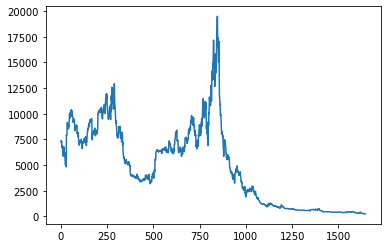

In [16]:
#plotting closing prices
ax1 = btc_day_copy['Close'].plot(style = ['-'])

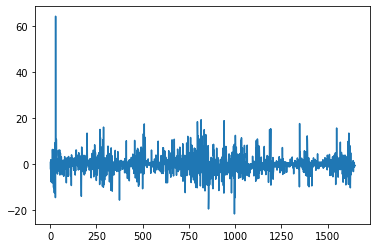

In [17]:
btc_day_copy.set_index('Date')
ax2 = btc_day_copy['Return'].plot(style = ['-'])

<AxesSubplot:>

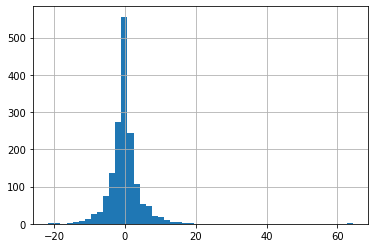

In [18]:
btc_day_copy['Return'].hist(bins=50)

<AxesSubplot:>

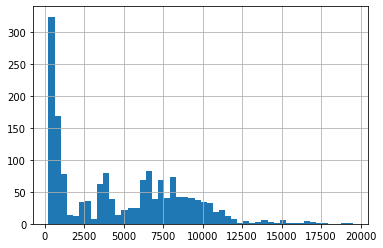

In [19]:
btc_day_copy['Close'].hist(bins=50)

<AxesSubplot:ylabel='Density'>

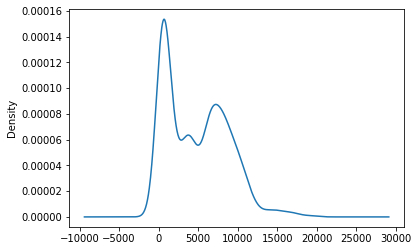

In [20]:
#kernel density
btc_day_copy['Close'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

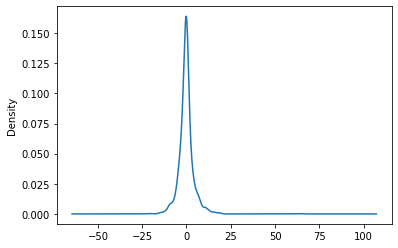

In [21]:
btc_day_copy['Return'].plot(kind='kde')

C:\Users\Sahil\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<AxesSubplot:>

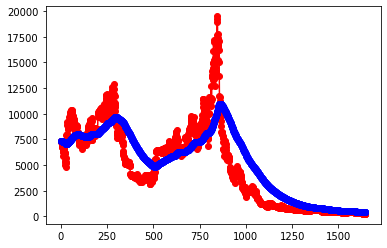

In [22]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(btc_day_copy['Close']).fit(smoothing_level=.01, optimized=False)
btc_day_copy['Close'].plot(marker = 'o', color='red')
model.fittedvalues.plot(marker = 'o', color = 'blue')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

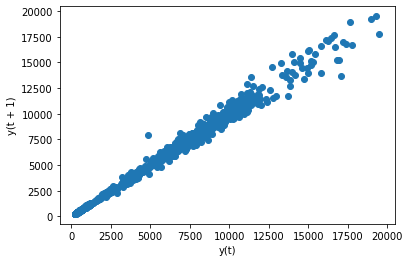

In [23]:
from pandas.plotting import lag_plot
lag_plot(btc_day_copy['Close'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

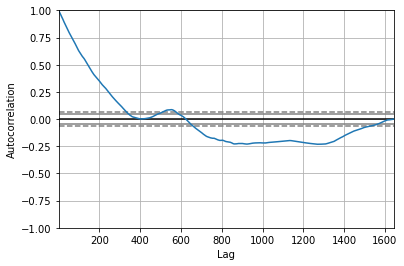

In [24]:
#Autocorrelation plot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(btc_day_copy['Close'])

In [25]:
btc_day_copy['Typical Price']=btc_day_copy[['High','Low','Close']].mean(axis = 1)
btc_day_copy.head()

Date  Symbol     Open     High      Low    Close  Volume BTC  \
1 2020-04-09  BTCUSD  7369.60  7378.85  7115.04  7315.25     2237.13   
2 2020-04-08  BTCUSD  7201.81  7432.23  7152.80  7369.60     2483.60   
3 2020-04-07  BTCUSD  7336.96  7468.42  7078.00  7201.81     2333.34   
4 2020-04-06  BTCUSD  6775.21  7369.76  6771.01  7336.96     3727.47   
5 2020-04-05  BTCUSD  6870.20  6907.90  6678.60  6775.21     1275.49   

    Volume USD    Return  Typical Price  
1  16310014.53       NaN    7269.713333  
2  18138080.27  0.742968    7318.210000  
3  17047120.32 -2.276786    7249.410000  
4  26533750.17  1.876612    7159.243333  
5   8662210.80 -7.656441    6787.236667

In [26]:
Typical_price_mul_volbtc = btc_day_copy['Typical Price']*btc_day_copy['Volume BTC']
Total = Typical_price_mul_volbtc.sum()
SUM_VolumeBTC = btc_day_copy['Volume BTC'].sum()
VWAP = Total/SUM_VolumeBTC
VWAP

5632.878677883877

In [27]:
Typical_price_mul_volbtc

1       1.626329e+07
2       1.817551e+07
3       1.691534e+07
4       2.668586e+07
5       8.657052e+06
            ...     
1642    9.502372e+03
1643    3.035855e+03
1644    2.990575e+03
1645    7.633457e+03
1646    4.583753e+03
Length: 1643, dtype: float64

In [28]:
btc_day_date_index = btc_day_copy.set_index('Date')

In [29]:
candlestick = go.Candlestick(
   x = btc_day_date_index.index,
   open = btc_day_date_index['Open'],
   high = btc_day_date_index['High'],
   low = btc_day_date_index['Low'],
   close = btc_day_date_index['Close'])

fig = go.Figure(data = [candlestick])
fig.show()

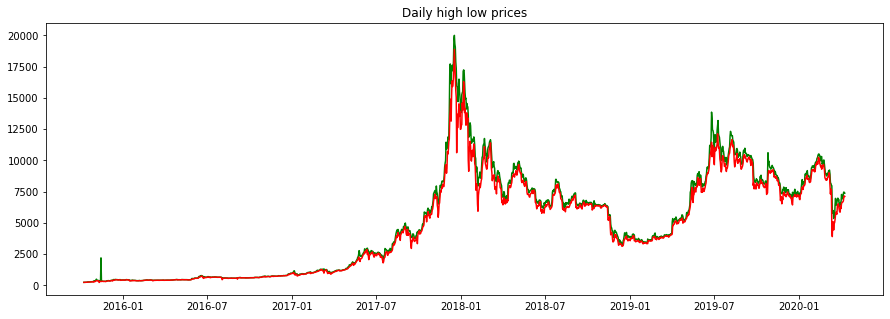

In [30]:
plt.figure (figsize=(15,5))
plt.plot(btc_day_date_index['High'], color='green')
# Plot the daily low price
plt.plot(btc_day_date_index['Low'], color='red')
plt.title('Daily high low prices')
plt.show()

In [31]:
# Resample from daily to weekly

btc_weekly = btc_day_date_index.resample('W').mean()
btc_weekly.head()

Open        High         Low       Close   Volume BTC  \
Date                                                                      
2015-10-11  244.535000  247.692500  244.250000  246.285000    18.545000   
2015-10-18  256.031429  263.710000  254.200000  258.648571   175.141429   
2015-10-25  275.254286  281.348571  273.404286  278.242857   337.531429   
2015-11-01  306.202857  323.670000  293.718571  312.005714   939.355714   
2015-11-08  378.771429  417.978571  359.361429  385.485714  1708.240000   

               Volume USD    Return  Typical Price  
Date                                                
2015-10-11    4563.257500 -0.367872     246.075833  
2015-10-18   46461.315714 -1.347957     258.852857  
2015-10-25   93461.344286 -0.810194     277.665238  
2015-11-01  293904.180000 -3.321859     309.798095  
2015-11-08  670326.267143 -0.407066     387.608571

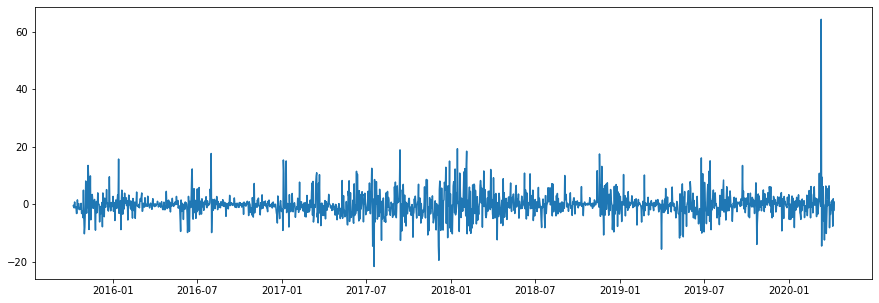

In [32]:
#DAILY RETURNS

plt.figure (figsize=(15,5))
plt.plot(btc_day_date_index['Return'])
plt.show()

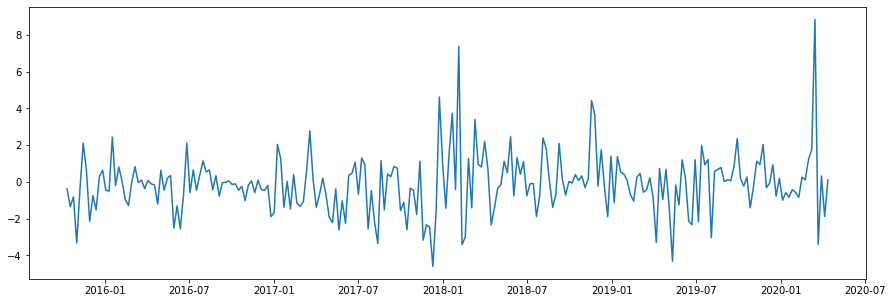

In [33]:
#WEEKLY RETURN

plt.figure (figsize=(15,5))
plt.plot(btc_weekly['Return'])
plt.show()

# DATA TRANSFORMATION
## SMA- Simple Moving Average
It is simply the arithmetic mean of the price over a specified period. The average is called "moving" because it is always calculated using the most recent n periods, and therefore moves along with the price on the chart.

In [34]:
fig1 = go.Figure(
        data = [
            go.Candlestick(
                x = btc_day_date_index.index,
                open = btc_day_date_index.Open,
                high = btc_day_date_index.High,
                low = btc_day_date_index.Low,
                close = btc_day_date_index.Close
            ),
            go.Scatter(
                x = btc_day_date_index.index, 
                y = btc_day_date_index.Close.rolling(window=20).mean(),
                mode = 'lines', 
                name = '20SMA',
                line = {'color': '#ff006a'}
            ),
            go.Scatter(
                x = btc_day_date_index.index, 
                y = btc_day_date_index.Close.rolling(window=50).mean(),
                mode = 'lines', 
                name = '50SMA',
                line = {'color': '#1900ff'}
            )
        ]
    )

fig1.update_layout(
    title = 'The Candlestick graph for BITCOIN',
    xaxis_title = 'Date',
    yaxis_title = 'Price CURRENCY',
    xaxis_rangeslider_visible = False
)
#fig1.update_yaxes(tickprefix='£')

fig1.show()

https://itnext.io/create-beautiful-cryptocurrency-graphs-in-python-bec7b9cbc21a

In [35]:
fig2 = go.Figure(
        data = [
            go.Scatter(
                x = btc_day_date_index.index, 
                y = btc_day_date_index.Close,
                mode = 'lines', 
                name = 'Close',
                line = {'color': '#006400'}
            ),
            go.Scatter(
                x = btc_day_date_index.index, 
                y = btc_day_date_index.Close.rolling(window=20).mean(),
                mode = 'lines', 
                name = '20SMA',
                line = {'color': '#ff006a'}
            ),
            go.Scatter(
                x = btc_day_date_index.index, 
                y = btc_day_date_index.Close.rolling(window=50).mean(),
                mode = 'lines', 
                name = '50SMA',
                line = {'color': '#1900ff'}
            )
        ]
    )

fig2.update_layout(
    #title = 'The Candlestick graph for BITCOIN',
    xaxis_title = 'Date',
    yaxis_title = 'Close',
    xaxis_rangeslider_visible = False
)
#fig1.update_yaxes(tickprefix='£')

fig2.show()

https://www.youtube.com/watch?v=PUk5E8G1r44
# SMA END

In [36]:
btc_day_sorted = btc_day.sort_index(by='Date', ascending = True)

TypeError: DataFrame.sort_index() got an unexpected keyword argument 'by'

In [ ]:
btc_day_sorted_date = btc_day.sort_values(by = 'Date')
btc_day_sorted_date_index = btc_day_sorted_date.set_index('Date')
btc_day_sorted_date_index.head()

Symbol    Open    High    Low   Close  Volume BTC  Volume USD
Date                                                                     
2015-10-08  BTCUSD  242.50  245.00  242.5  243.95       18.80     4595.84
2015-10-09  BTCUSD  243.95  249.97  243.6  245.39       30.99     7651.63
2015-10-10  BTCUSD  245.39  246.30  244.6  246.30       12.17     2984.44
2015-10-11  BTCUSD  246.30  249.50  246.3  249.50       12.22     3021.12
2015-10-12  BTCUSD  249.50  249.50  247.6  247.60       38.28     9493.89

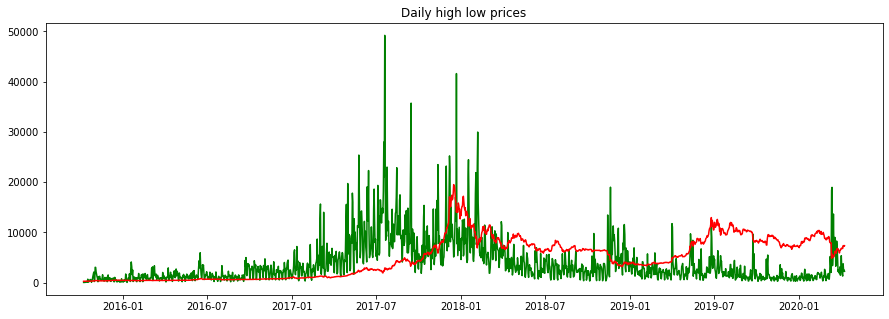

In [37]:
plt.figure (figsize=(15,5))
plt.plot(btc_day_date_index['Volume BTC'], color='green')
# Plot the daily low price
plt.plot(btc_day_date_index['Close'], color='red')
plt.title('Daily high low prices')
plt.show()

In [38]:
btc_min

Unix Timestamp                 Date  Symbol     Open     High  \
0         1586390400000  2020-04-09 00:00:00  BTCUSD  7369.60  7369.60   
1         1586390340000  2020-04-08 23:59:00  BTCUSD  7364.37  7369.60   
2         1586390280000  2020-04-08 23:58:00  BTCUSD  7360.89  7367.18   
3         1586390220000  2020-04-08 23:57:00  BTCUSD  7357.62  7366.12   
4         1586390160000  2020-04-08 23:56:00  BTCUSD  7370.71  7370.71   
...                 ...                  ...     ...      ...      ...   
2283514      1444311840  2015-10-08 13:44:00  BTCUSD   242.96   242.96   
2283515      1444311780  2015-10-08 13:43:00  BTCUSD   242.95   242.96   
2283516      1444311720  2015-10-08 13:42:00  BTCUSD   242.95   242.95   
2283517      1444311660  2015-10-08 13:41:00  BTCUSD   242.50   242.95   
2283518      1444311600  2015-10-08 13:40:00  BTCUSD     0.00   242.50   

             Low    Close    Volume  
0        7348.47  7350.41  7.733528  
1        7364.37  7369.60  1.310954  
2        7360.89  7364.37  1.018774  
3        7357.62  7360.89  0.026251  
4        7357.62  7357.62  0.444867  
...          ...      ...       ...  
2283514   242.96   242.96  0.033491  
2283515   242.95   242.96  0.010000  
2283516   242.95   242.95  0.000000  
2283517   242.50   242.95  0.001000  
2283518     0.00   242.50  0.050000  

[2283519 rows x 8 columns]

In [39]:
btc_min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2283519 entries, 0 to 2283518
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unix Timestamp  int64  
 1   Date            object 
 2   Symbol          object 
 3   Open            float64
 4   High            float64
 5   Low             float64
 6   Close           float64
 7   Volume          float64
dtypes: float64(5), int64(1), object(2)
memory usage: 139.4+ MB


In [40]:
btc_min_copy = btc_min.copy()
btc_min_copy.drop(['Unix Timestamp', 'Symbol'],axis = 1, inplace = True)
btc_min_copy.head()

Date     Open     High      Low    Close    Volume
0  2020-04-09 00:00:00  7369.60  7369.60  7348.47  7350.41  7.733528
1  2020-04-08 23:59:00  7364.37  7369.60  7364.37  7369.60  1.310954
2  2020-04-08 23:58:00  7360.89  7367.18  7360.89  7364.37  1.018774
3  2020-04-08 23:57:00  7357.62  7366.12  7357.62  7360.89  0.026251
4  2020-04-08 23:56:00  7370.71  7370.71  7357.62  7357.62  0.444867

In [41]:
btc_min_copy['Date'] = pd.to_datetime(btc_min_copy['Date'])

In [43]:
import mplfinance as mpf

v = btc_min_copy['Volume'].values
tp = (btc_min_copy['Low'] + btc_min_copy['Close'] + btc_min_copy['High']).div(3).values
btc_min_copy = btc_min_copy.assign(vwap=(tp * v).cumsum() / v.cumsum())

fig3 = go.Figure(data=[go.Candlestick(x=btc_min_copy.iloc[:, 1],
                open=btc_min_copy['Open'],
                high=btc_min_copy['High'],
                low=btc_min_copy['Low'],
                close=btc_min_copy['Close'],name='Bitcoin')])

fig3.add_trace(go.Scatter(
    x=btc_min_copy.iloc[:, 1],
    y=btc_min_copy['vwap'],
    mode='lines',
    name='vwap', 
    line=dict(color='royalblue',width=2)
))

fig3.update_layout(
    height=600
)
fig3.show()